#  Machine Learning Model for Wine DataSet

# Results 98.14 % 

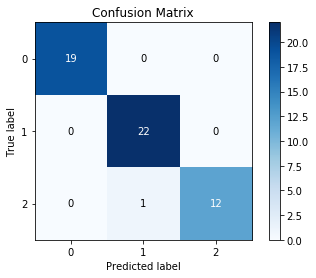

In [79]:
skplt.metrics.plot_confusion_matrix(Y_Test, prediction)

### Import the Library

In [75]:
from sklearn.datasets import load_wine
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scikitplot as skplt

In [74]:
!pip install scikit-plot

    100% |████████████████████████████████| 286kB 8.4MB/s eta 0:00:01


### Load the Dataset 

In [2]:
wine_data = load_wine()

In [3]:
type(wine_data)

sklearn.utils.Bunch

In [4]:
wine_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(wine_data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [49]:
label = ["Alcohol","Malic Acid","Ash","Alcalinity of Ash","Magnesium","Total Phenols","Flavanoids",
         "Nonflavanoid Phenols", "Proanthocyanins","Colour Intensity","Hue","OD280/OD315 of diluted wines",
        "Proline"]

### Get the X_Data 

In [6]:
feat_data = wine_data["data"]

### Get  the Y_Data

In [7]:
label = wine_data["target"]

###  Create Train and Test Data using Train Test Split 

In [8]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(feat_data, label, test_size=0.3,random_state=101)

### Create a Min Max Scalar to Scale the Dataset 

In [9]:
scalar = MinMaxScaler()


### Scale the X_Data

In [10]:
scaled_X_Data = scalar.fit_transform(X_Train)

### Scale the Y_ Data

In [11]:
scaled_X_Test = scalar.fit_transform(X_Test)

### Check the Shape of Data set

In [12]:
scaled_X_Data.shape

(124, 13)

In [13]:
scaled_X_Test.shape

(54, 13)

### Create a Feature Colummn

In [14]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[13])]

### Create Model

In [21]:
model = tf.estimator.DNNClassifier(
                                    feature_columns=feat_cols,
                                    hidden_units=[13,13,13],
                                    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
                                    n_classes=3,
                                    dropout=None,
                                    batch_norm=False
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmp183_az3l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a32b9d7b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Create a input Function

In [22]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':scaled_X_Data},
                                               y=Y_Train,
                                               shuffle=True,
                                               batch_size=10,
                                               num_epochs=100)

### Create a Test input Function

In [23]:
test_func = tf.estimator.inputs.numpy_input_fn({'x':scaled_X_Test},
                                               y=Y_Test,
                                               shuffle=False,
                                               batch_size=10,
                                               num_epochs=1)

In [24]:
model.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmp183_az3l/model.ckpt.
INFO:tensorflow:loss = 11.588047, step = 1
INFO:tensorflow:global_step/sec: 659.638
INFO:tensorflow:loss = 2.1665013, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 1021.02
INFO:tensorflow:loss = 6.5470495, step = 201 (0.098 sec)
INFO:tensorflow:global_step/sec: 1008.66
INFO:tensorflow:loss = 1.2689465, step = 301 (0.099 sec)
INFO:tensorflow:global_step/sec: 997.743
INFO:tensorflow:loss = 0.32332096, step = 401 (0.100 sec)
INFO:tensorflow:Saving checkpoints for 500 into /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmp183_az3l/model.ckpt.
INFO:tensorflow:Loss for final step: 0.054181002.


### Test the Data

In [35]:
preds = list(model.predict(input_fn=test_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmp183_az3l/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [37]:
prediction = [p["class_ids"][0] for p in preds]

In [ ]:
label = []

In [41]:
data = classification_report(Y_Test,prediction,label)

In [54]:
print(data)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.96      1.00      0.98        22
           2       1.00      0.92      0.96        13

   micro avg       0.98      0.98      0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



In [57]:
conmat = confusion_matrix(Y_Test,prediction)

In [61]:
df = pd.DataFrame(data=conmat)
df

,0,1,2
0,19,0,0
1,0,22,0
2,0,1,12


### Confusion Matrix 

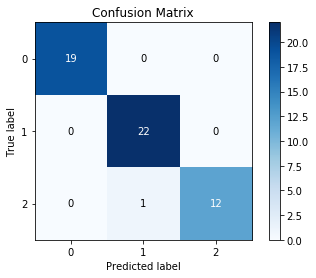

In [78]:
skplt.metrics.plot_confusion_matrix(Y_Test, prediction)

### Accuracy is 98.14